<a href="https://colab.research.google.com/github/aryamanpathak2022/Sentimental_analysis_wn/blob/main/ensemble/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install textblob
!pip install vaderSentiment
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 9.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-man

In [2]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from flair.data import Sentence
from flair.models import TextClassifier
import pandas as pd

In [3]:
# Load Data:

data = pd.read_csv("./drive/MyDrive/Sentiment_analysis/processed_Articles.csv")
text_column = "Processed_Article"  # Adjust based on your column name
texts = data[text_column]

In [4]:
sentiment_model = TextClassifier.load('sentiment-fast')

2024-06-27 15:02:31,245 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-fasttext-rnn/sentiment-en-mix-ft-rnn_v8.pt not found in cache, downloading to /tmp/tmp9kyw5ymg


100%|██████████| 1.16G/1.16G [01:14<00:00, 16.7MB/s]

2024-06-27 15:03:46,031 copying /tmp/tmp9kyw5ymg to cache at /root/.flair/models/sentiment-en-mix-ft-rnn_v8.pt


2024-06-27 15:03:51,965 removing temp file /tmp/tmp9kyw5ymg


In [21]:
textblob_scores = []
vader_scores = []
flair_scores = []



In [19]:
def sentiment_to_category(score):
    if score > 0.8:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'


In [22]:
for text in texts:
    # TextBlob
    blob = TextBlob(text)
    textblob_scores.append(sentiment_to_category(blob.sentiment.polarity))

    # VADER
    analyzer = SentimentIntensityAnalyzer()
    vader_scores.append(sentiment_to_category(analyzer.polarity_scores(text)['compound']))

    # Flair
    sentence = Sentence(text)
    sentiment_model.predict(sentence)
    flair_scores.append(sentiment_to_category(sentence.labels[0].score))  # Get score from first label


In [23]:
print(len(texts))
print(len(textblob_scores))
print(len(vader_scores))
print(len(flair_scores))

198
198
198
198


In [24]:
# ensemble
# Create a DataFrame (assuming you have other data)
data = pd.DataFrame({ 'textblob_sentiment': textblob_scores,
                     'vader_sentiment': vader_scores, 'flair_sentiment': flair_scores})

#  find the most frequent
data['ensemble_sentiment'] = data[['textblob_sentiment', 'vader_sentiment', 'flair_sentiment']].mode(axis=1).iloc[:, 0]

# Print a sample of the data
print(data['ensemble_sentiment'])

0      negative
1      negative
2      negative
3      positive
4      positive
         ...   
193    positive
194    negative
195    negative
196    negative
197    negative
Name: ensemble_sentiment, Length: 198, dtype: object


In [25]:
# print(data[['text', 'ensemble_sentiment']])

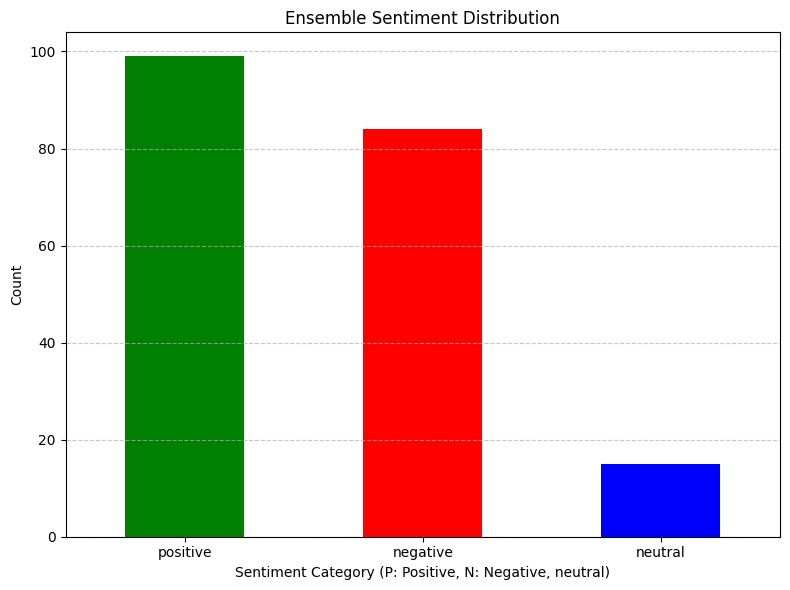

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'ensemble_sentiment' column

# Count sentiment categories
sentiment_counts = data['ensemble_sentiment'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])  # Adjust colors as needed
plt.title('Ensemble Sentiment Distribution')
plt.xlabel('Sentiment Category (P: Positive, N: Negative, neutral)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines
plt.tight_layout()

plt.show()
